# Finding Heavy Traffic Indicators on I-94

In this project, I am going to focus on exploratory data visualization by using matplotlib library to visualize the data set, in order to make learning smoother and more efficient. 

The data set that is going to be explored is about the wesbound traffic on the [I-94 Intersate highway.](https://en.wikipedia.org/wiki/Interstate_94)

John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

The goal of this analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer of when it snows.

### The I-94 Traffic Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [2]:
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


### Analyzing Traffic Volume

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records the westbound traffic (vehicles moving from east to west).

This means, the results of our analysis will be about the westbound traffic in the proximity of that station, it should not be generalized for the entire I-94 highway.

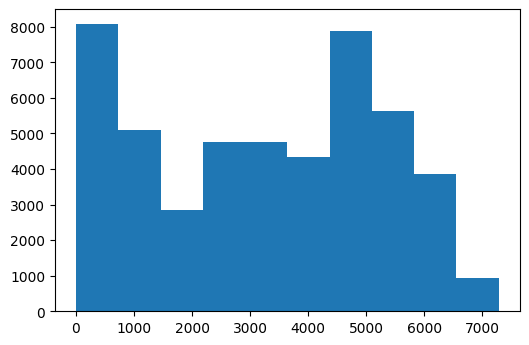

In [3]:
plt.hist(traffic["traffic_volume"])
plt.show()

In [4]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Few noticable patterns according to the information presented from the histogram distribution of `traffic_volume` column and the result of `Series.describe()`. Traffic volumne around approximately `5000` and `0 - 1000` volume appear most frequent during any hour.

Daytime and nighttime might have influence on the traffic volume, however, more analysis needs to be  done to get the better picture.

### Traffic Volume: Day vs. Night

This dataset can be divided into two parts:
- Daytime data: hours from 7 a.m. to 7p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not the perfect criterion for distinguishing between nighttime and daytime, it;s a good starting point.

In [5]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

hour = traffic["date_time"].dt.hour 

day = traffic.copy()[(hour >= 7) & (hour < 19)]
night = traffic.copy()[(hour >= 19) | (hour < 7)]

print(day.shape)
print(night.shape)

(23877, 9)
(24327, 9)


The significant difference between rows of day and night dataset is due to the missing data in the `date_time` column. For example, hour `5 (a.m.)` and `4 (a.m.)` are missing.

In [6]:
traffic.iloc[176:178]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
176,None,281.17,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 03:00:00,361
177,None,281.25,0.0,0.0,92,Clear,sky is clear,2012-10-10 06:00:00,5875


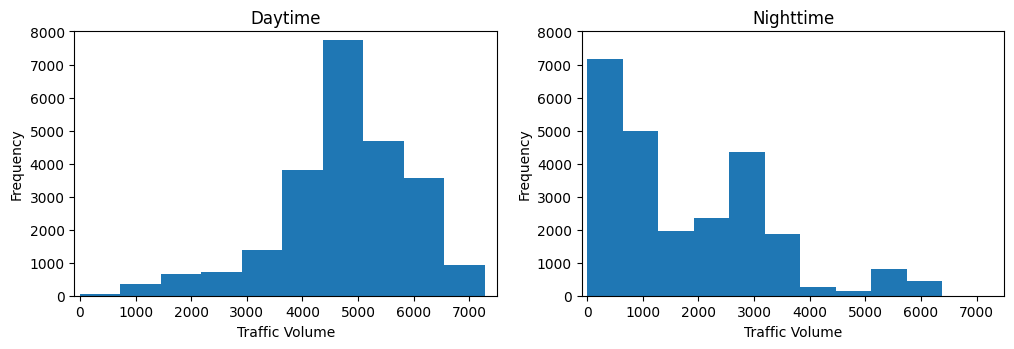

In [7]:
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title("Daytime")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")


plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title("Nighttime")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.show()

In [8]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

`Day` Histrogram: the highest occurence of `traffic volume` is about `5000` vehicles in one hour with the frequency of more than `7000`. The distribution is left-skewed, therefore, a lot lower frequency of less `traffic volume` towards the left of the graph. This means that during the day (from 7 AM to 7 PM), traffic volume is relatively high, ranging from `4000` to `6000` vehicles in one hour.

`Night` Histogram: the highest occurence of `traffic volume` is in between `0` and `1000` vehicles in one hour with the frequency of `7000` times. The distribution is right-skewed, therefore, a lot lower frequency of more `traffic volume` towards the right of the graph. This means that during nighttime(from 7 PM to 7 AM), traffic volume is relatively low, ranging from `0` to `2000` vehicles in one hour.

Based on the primary goal of this analysis on factors contributing to heavy traffic and traffic is relatively light at nighttime, it is best to have `night` dataset omitted from the analysis.

### Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

Let's look at a few line plots showing how the traffic volume changes according to the following:

- Month
- Day of the week
- Time of day

In [10]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

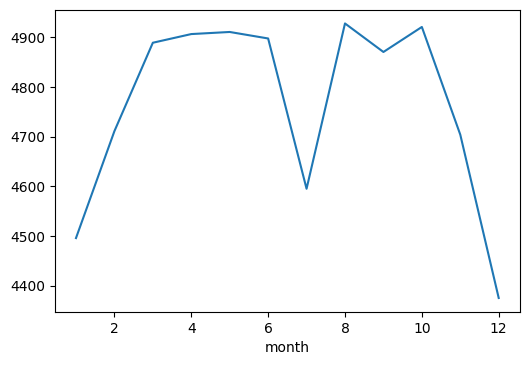

In [11]:
by_month['traffic_volume'].plot.line()
plt.show()

Traffic volume is generally high during warm period (March to November). However, there is quite a drop in volume during December and February, and moderate drop in July, but it quickly recovers in August. 

Less traffic volume from December to February can be explained due to extreme weather in the north of USA, i.e. snow storm, icy weather. 

I can analyze `July` to get better picture of what happen there.

In [12]:
day['year'] = day['date_time'].dt.year
every_july = day[day['month'] == 7].groupby('year').mean()
every_july

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month
year,,,,,,
2013,296.796832,0.529838,0.0,24.245946,4914.354054,7.0
2014,296.225777,0.296686,0.0,52.542522,4871.598240,7.0
2015,296.657288,0.457241,0.0,35.301887,4613.146226,7.0
2016,297.018584,24.633670,0.0,52.534483,3924.923645,7.0
2017,297.139799,0.000000,0.0,41.724311,4734.120301,7.0
2018,296.794566,0.000000,0.0,46.719178,4586.899543,7.0


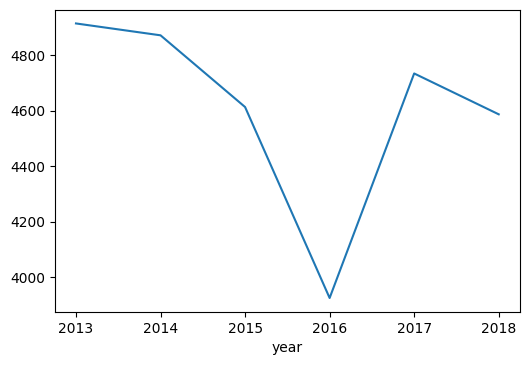

In [13]:
every_july['traffic_volume'].plot.line()
plt.show()

Overall, from 2013 to 2018, the traffic volume in July maintains constant flow. In 2016, there was a road construction that put I-94 to closure, in reference to this [article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696).

### Time Indicators (II)

I'll now continue with building line plot showing how the traffic volume changed in each day of the week.

In [14]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

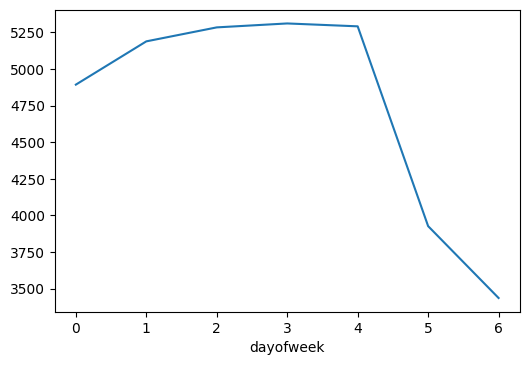

In [15]:
by_dayofweek["traffic_volume"].plot.line()
plt.show()

Interestingly, traffic is a lot less intense during weekend with expected volume to be less than `4000`, traffic gets more heavily during weekdays with expected volume to be at least `5000`.

### Time Indicators (III)

I'll now generate the line plot for time of the day. The weekends, however, will drag down the average values, so the dataset `day` can be splitted into `weekday` and `weekend`, then we can compare two graphs.

In [16]:
day['hour'] = day['date_time'].dt.hour
weekday = day.copy()[ day['dayofweek'] <= 4]    # 4 == Friday
weekend = day.copy()[ day['dayofweek']  >= 5]  # 5 == Saturday

by_hour_weekday = weekday.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_weekday['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


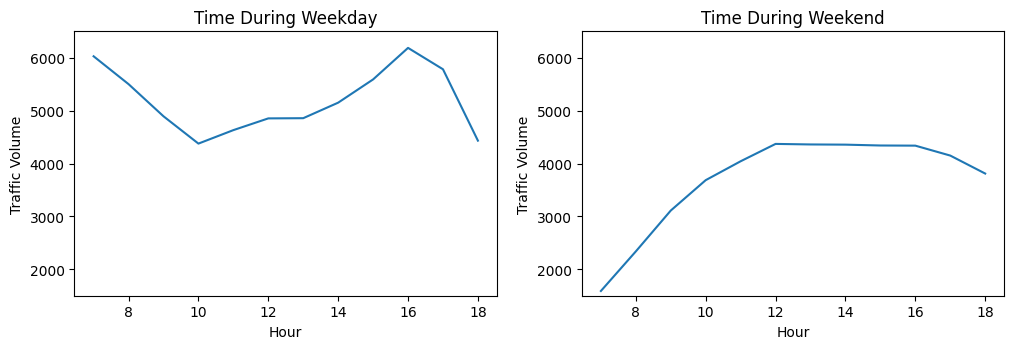

In [17]:
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
by_hour_weekday['traffic_volume'].plot.line()
plt.ylim(1500,6500)
plt.title("Time During Weekday")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.ylim(1500,6500)
plt.title("Time During Weekend")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.show()

During `Weekday`, the traffic volume is highest between `3 PM` and `5 PM`, and `7 AM`, they represents rush-hour, when people comute to work in the morning and come back home in the afternoon.

During `Weekend`, the traffic volume is relatively low compared to `Weekday`, traffic gets most intense between `12 PM` and `5 PM`, it is might be because some people like to travel during `weekends`.

So far, I have found folowing information:
- The traffic is usually heavier during warm months (March-October), compared to cold months (December-February)
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are in the morning (around 7 AM), and in the afternoon (3 PM - 5 PM).

### Weather Indicators

Another possible indicator of heavy traffic is weather. Let's start with looking at their correlation with `traffic_volume`.

In [18]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Out of numeric weather columns `temp`, `rain_1h`, `snow_1h`, `clouds_all`. The correlation between `temp` and `traffic_volume` is the strongest, `0.128`. Let's graph them two. 

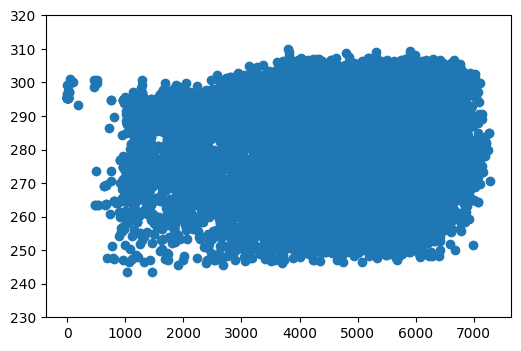

In [19]:
plt.scatter(day['traffic_volume'],day['temp'])
plt.ylim(230,320)
plt.show()

Virtually, all the dots are scattered almost horizontally. Although `0.128` is the strongest correlation pair, `temp` is not a good indicator of heavy traffic.

Let's check the categorical weather-related columns: `weather_main` and `weather_description` column.

### Weather Types

In [20]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

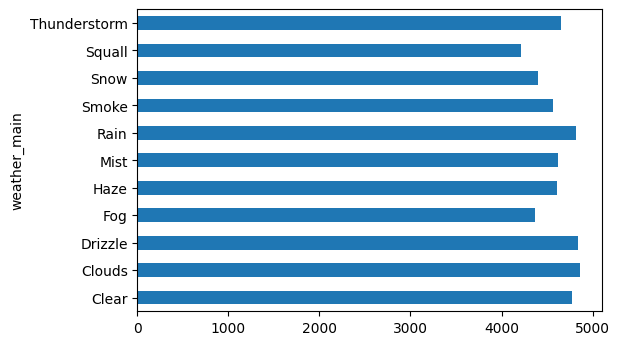

In [21]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

There is not a weahter type that relates to traffic volume exceeding `5000`, but `Clouds` has the maximum traffic volume with `4865`, second highest traffic volume is `Drizzle`.

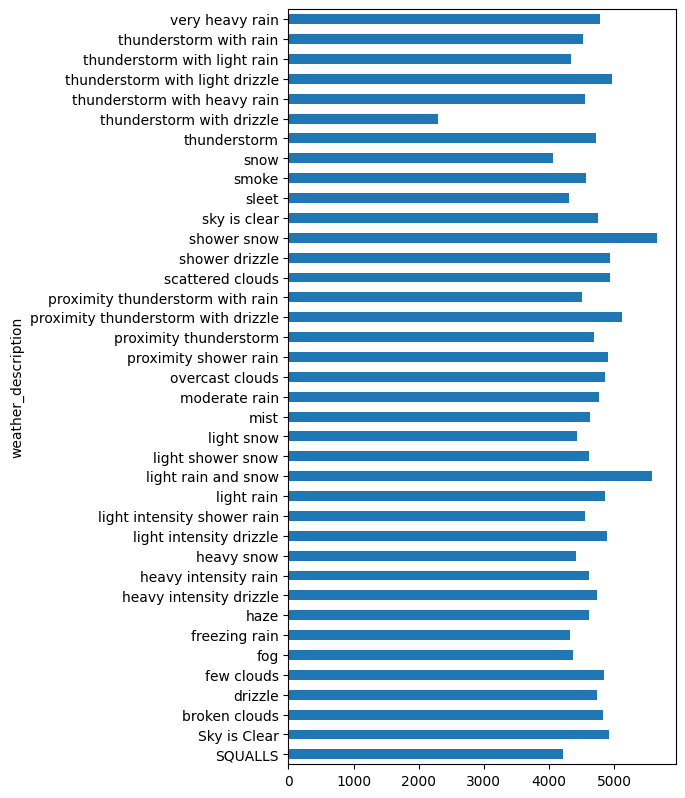

In [22]:
plt.figure(figsize = (5, 10))
by_weather_description['traffic_volume'].plot.barh()
plt.show()

In [23]:
by_weather_description['traffic_volume'].sort_values(ascending = False).iloc[:7]

weather_description
shower snow                            5664.000000
light rain and snow                    5579.750000
proximity thunderstorm with drizzle    5121.833333
thunderstorm with light drizzle        4960.000000
scattered clouds                       4936.787712
shower drizzle                         4932.666667
Sky is Clear                           4919.009390
Name: traffic_volume, dtype: float64

There are three main weather types that relate to traffic volume exceeding 5,000:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

One reason might be that because the weather is bad enough that might cause vehicles to slow down on highway, leading to trail of cars piling up at some point.

## Conclusion

In this project, the primary goal was to find couple indicators relating to heavy traffic on I-94. So far, I managed to find two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are between 15 and 17, and in the morning around 7.
    - On the weekend, traffic becomes intense from 12 to 17.

- Weather Indicators:
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle